In [1]:
# 数据处理
import pandas as pd
import numpy as np
 
# 绘图
import seaborn as sns
import matplotlib.pyplot as plt
# 因子分析
from factor_analyzer import FactorAnalyzer


In [3]:
df = pd.read_csv("D:\software_bag_X\MicrosoftVScodefiles\year_after1.csv", index_col=1,encoding='utf-8')
df

,x25,x14,x16,x6,x20,x11,x13,x24,x19,x10,x12,x18,x17,x23
x25.1,,,,,,,,,,,,,,
6283.00000,6283.00000,800.00000,1.800000e+04,3.869755e+08,231.000000,339126067,13.870000,0.113000,96.000000,65617683,-1.670000,85.000000,1045.000000,8.530000
7040.00000,7040.00000,1800.00000,2.100000e+04,4.843870e+09,235.000000,4764454897,14.150833,0.123300,144.000000,776045999,1.580833,64.000000,1222.000000,9.570000
7646.00000,7646.00000,1500.00000,2.300000e+04,5.493843e+09,236.000000,5475406932,14.347500,0.131300,582.000000,915933764,0.941667,95.000000,2278.000000,10.480000
8034.00000,8034.00000,3300.00000,5.000000e+04,5.447269e+09,277.000000,6486308685,14.070000,0.146900,1044.000000,1351715915,-0.347500,134.000000,3104.000000,11.230000
8063.00000,8063.00000,2700.00000,1.400000e+05,7.867538e+09,226.000000,6567863324,13.210833,0.147100,1500.000000,1810453251,-4.355833,157.000000,3770.000000,11.060000
8760.00000,8760.00000,7900.00000,2.140000e+05,1.133936e+10,238.000000,7987099115,13.588333,0.151200,1438.000000,1335784063,2.665000,185.000000,6029.000000,12.310000
9849.00000,9849.00000,6500.00000,3.300000e+05,1.381579e+10,219.000000,10824535670,14.210000,0.160600,1552.000000,1292709295,7.014167,248.000000,9603.000000,13.890000
10170.00000,10170.00000,20000.00000,5.100000e+05,1.594511e+10,235.000000,13031435401,14.551667,0.162800,1160.000000,1323709327,4.414167,244.000000,4649.000000,14.280000
10525.00000,10525.00000,13000.00000,8.000000e+05,2.039163e+10,199.000000,15941002496,15.395000,0.172400,1376.000000,1492693116,6.540000,246.000000,3866.000000,14.690000


In [4]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
 
chi_square_value, p_value = calculate_bartlett_sphericity(df)
chi_square_value, p_value

(728.2784767956889, 4.3567366760876837e-100)

In [5]:
#KMO检验
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

0.7186681209664525

In [6]:
faa = FactorAnalyzer(25,rotation=None)
faa.fit(df)
 
# 得到特征值ev、特征向量v
ev,v=faa.get_eigenvalues()
print(ev,v)

[1.11958720e+01 1.04824965e+00 8.68869788e-01 4.25811909e-01
 2.25269650e-01 1.18289782e-01 6.17476357e-02 3.25257493e-02
 1.17745416e-02 8.10925935e-03 2.20891813e-03 1.09953411e-03
 1.52918121e-04 1.86687796e-05] [ 1.11870879e+01  7.79886736e-01  3.55872691e-01  3.04279475e-01
  2.05602590e-01  1.11630664e-01  5.24305702e-02  2.79395846e-02
  7.01601577e-03  1.87272634e-03 -8.16704850e-04 -9.21566028e-04
 -1.39338313e-03 -3.13460911e-03]


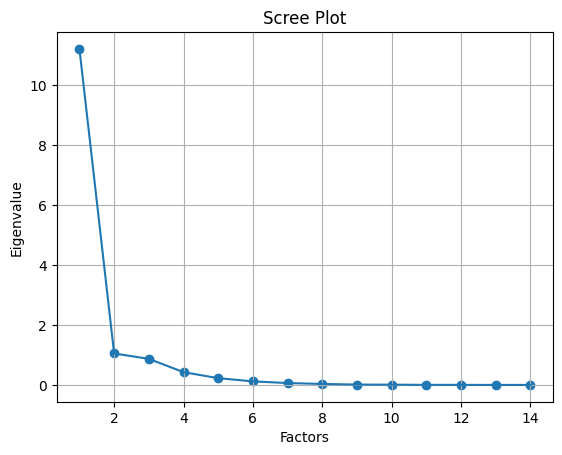

In [7]:
 # 同样的数据绘制散点图和折线图
plt.scatter(range(1, df.shape[1] + 1), ev)
plt.plot(range(1, df.shape[1] + 1), ev)
 
# 显示图的标题和xy轴的名字
# 最好使用英文，中文可能乱码
plt.title("Scree Plot")  
plt.xlabel("Factors")
plt.ylabel("Eigenvalue")
 
plt.grid()  # 显示网格
plt.show()  # 显示图形

In [8]:
import matplotlib as mpl
 
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

In [9]:
# 选择方式： varimax 方差最大化
# 选择固定因子为 2 个
faa_two = FactorAnalyzer(2,rotation='varimax')
faa_two.fit(df)

FactorAnalyzer(n_factors=2, rotation='varimax', rotation_kwargs={})

In [10]:
# 公因子方差
faa_two.get_communalities()

array([0.99907414, 0.01821823, 0.83220969, 1.00739357, 0.92529124,
       0.34288878, 0.95973326, 0.99566247, 0.98286472, 0.93258059,
       0.92208453, 0.98744927, 0.7821923 , 0.99942501])

In [11]:
pd.DataFrame(faa_two.get_communalities(),index=df.columns)

,0
x25,0.999074
x14,0.018218
x16,0.832210
x6,1.007394
x20,0.925291
x11,0.342889
x13,0.959733
x24,0.995662
x19,0.982865
x10,0.932581


In [12]:
faa_two.get_eigenvalues()

(array([1.11958720e+01, 1.04824965e+00, 8.68869788e-01, 4.25811909e-01,
        2.25269650e-01, 1.18289782e-01, 6.17476357e-02, 3.25257493e-02,
        1.17745416e-02, 8.10925935e-03, 2.20891813e-03, 1.09953411e-03,
        1.52918121e-04, 1.86687796e-05]),
 array([ 1.11339635e+01,  5.56658637e-01,  1.48009477e-01,  7.12713178e-02,
         2.06196937e-02,  4.41107451e-04, -6.78522882e-04, -2.93592019e-03,
        -1.55164320e-02, -2.35537362e-02, -2.58396023e-02, -3.35939966e-02,
        -4.70341931e-02, -9.47435038e-02]))

In [13]:
pd.DataFrame(faa_two.get_eigenvalues())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,11.195872,1.048250,0.868870,0.425812,0.22527,0.118290,0.061748,0.032526,0.011775,0.008109,0.002209,0.001100,0.000153,0.000019
1,11.133963,0.556659,0.148009,0.071271,0.02062,0.000441,-0.000679,-0.002936,-0.015516,-0.023554,-0.025840,-0.033594,-0.047034,-0.094744


In [14]:
# 变量个数*因子个数
faa_two.loadings_

array([[ 0.90659697,  0.42089911],
       [-0.00191233, -0.13496138],
       [ 0.50436991,  0.76014518],
       [ 0.75471647,  0.66166201],
       [-0.94175424, -0.19593415],
       [ 0.57201158, -0.12526585],
       [ 0.90984058,  0.36321258],
       [ 0.94303369,  0.32611337],
       [ 0.89998642,  0.41579942],
       [ 0.90567444,  0.33516323],
       [ 0.78611052,  0.55146603],
       [ 0.89722291,  0.42713032],
       [ 0.84321039,  0.26681181],
       [ 0.9076309 ,  0.41908371]])

In [15]:
pd.DataFrame(faa_two.loadings_,index=df.columns)

,0,1
x25,0.906597,0.420899
x14,-0.001912,-0.134961
x16,0.504370,0.760145
x6,0.754716,0.661662
x20,-0.941754,-0.195934
x11,0.572012,-0.125266
x13,0.909841,0.363213
x24,0.943034,0.326113
x19,0.899986,0.415799
x10,0.905674,0.335163


In [16]:
faa_two.get_factor_variance()

(array([9.16512647, 2.52194132]),
 array([0.65465189, 0.18013867]),
 array([0.65465189, 0.83479056]))

In [17]:
df1 = pd.DataFrame(np.abs(faa_two.loadings_),index=df.columns)
print(df1)

            0         1
x25  0.906597  0.420899
x14  0.001912  0.134961
x16  0.504370  0.760145
x6   0.754716  0.661662
x20  0.941754  0.195934
x11  0.572012  0.125266
x13  0.909841  0.363213
x24  0.943034  0.326113
x19  0.899986  0.415799
x10  0.905674  0.335163
x12  0.786111  0.551466
x18  0.897223  0.427130
x17  0.843210  0.266812
x23  0.907631  0.419084


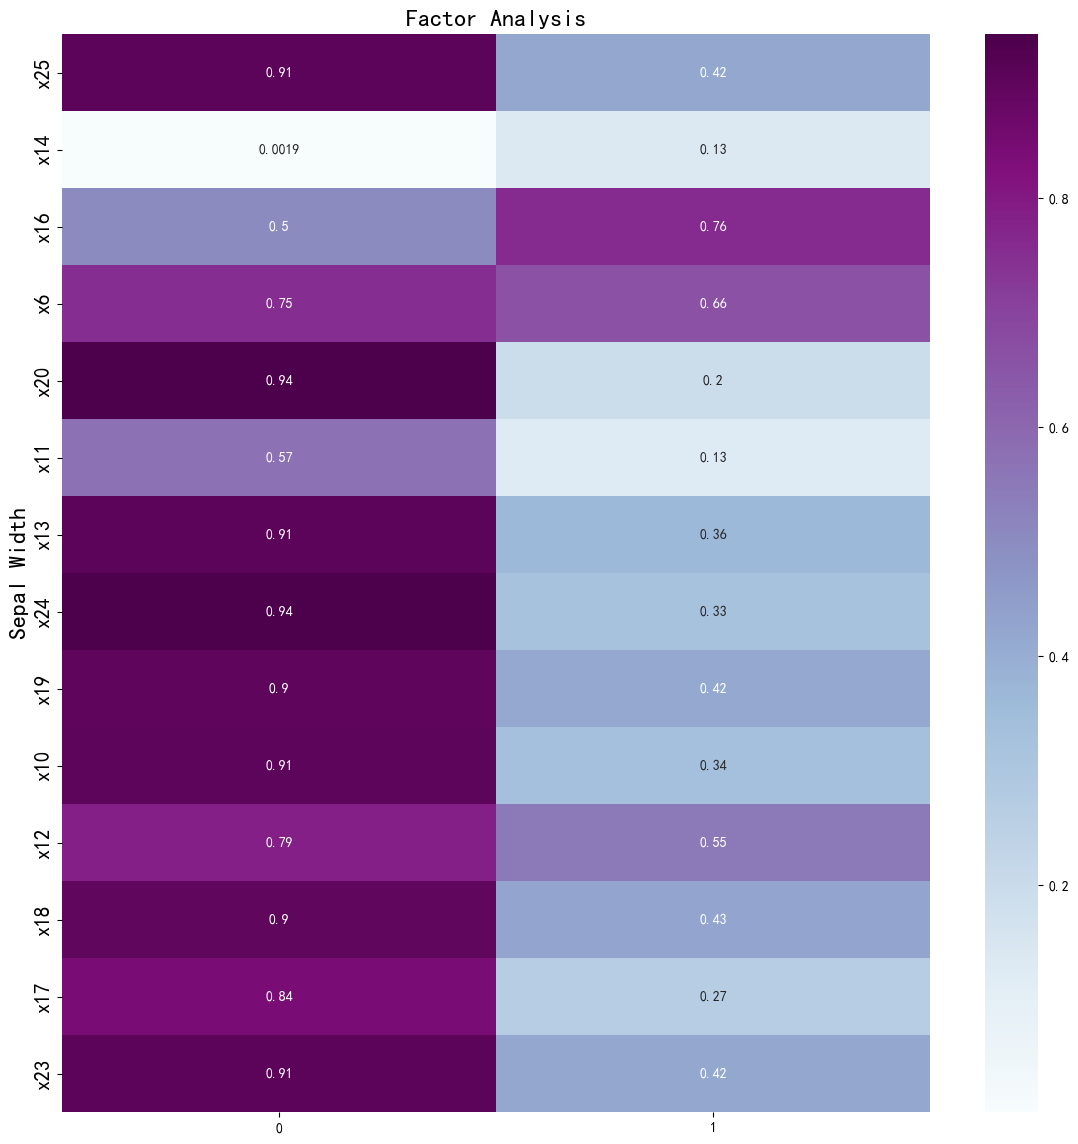

In [18]:
# 绘图
 
plt.figure(figsize = (14,14))
ax = sns.heatmap(df1, annot=True, cmap="BuPu")
 
# 设置y轴字体大小
ax.yaxis.set_tick_params(labelsize=15)
plt.title("Factor Analysis", fontsize="xx-large")
 
# 设置y轴标签
plt.ylabel("Sepal Width", fontsize="xx-large")
# 显示图片
plt.show()
 
# 保存图片
# plt.savefig("factorAnalysis", dpi=500)

In [19]:
faa_two.transform(df)

array([[-1.71026498,  0.32494768],
       [-2.07551694,  1.96972166],
       [-0.9509474 , -1.28803276],
       [-1.25733867, -0.33306585],
       [-1.26179472,  0.03576048],
       [-0.56762661,  0.86192622],
       [-1.11540011, -0.18603756],
       [-0.39210425, -0.04398477],
       [-0.74691609,  0.31830848],
       [ 0.34177526, -1.5158911 ],
       [ 0.58696145, -1.19106155],
       [ 0.77680481, -1.26948881],
       [ 0.34080529, -0.46893411],
       [ 0.54245898, -1.1175551 ],
       [ 1.26150517, -2.24303546],
       [ 1.32964333, -1.35424796],
       [ 1.08938181,  0.34067753],
       [ 1.4155567 , -0.17090666],
       [ 1.09579571,  1.33096625],
       [-0.77813995,  5.66398882],
       [ 2.07536122,  0.33594457]])

In [20]:
df2 = pd.DataFrame(faa_two.transform(df))
print(df2)

df2.to_excel("R1R2.xlsx")

           0         1
0  -1.710265  0.324948
1  -2.075517  1.969722
2  -0.950947 -1.288033
3  -1.257339 -0.333066
4  -1.261795  0.035760
5  -0.567627  0.861926
6  -1.115400 -0.186038
7  -0.392104 -0.043985
8  -0.746916  0.318308
9   0.341775 -1.515891
10  0.586961 -1.191062
11  0.776805 -1.269489
12  0.340805 -0.468934
13  0.542459 -1.117555
14  1.261505 -2.243035
15  1.329643 -1.354248
16  1.089382  0.340678
17  1.415557 -0.170907
18  1.095796  1.330966
19 -0.778140  5.663989
20  2.075361  0.335945


0     x25
1     x14
2     x16
3      x6
4     x20
5     x11
6     x13
7     x24
8     x19
9     x10
10    x12
11    x18
12    x17
13    x23
Name: x25, dtype: object


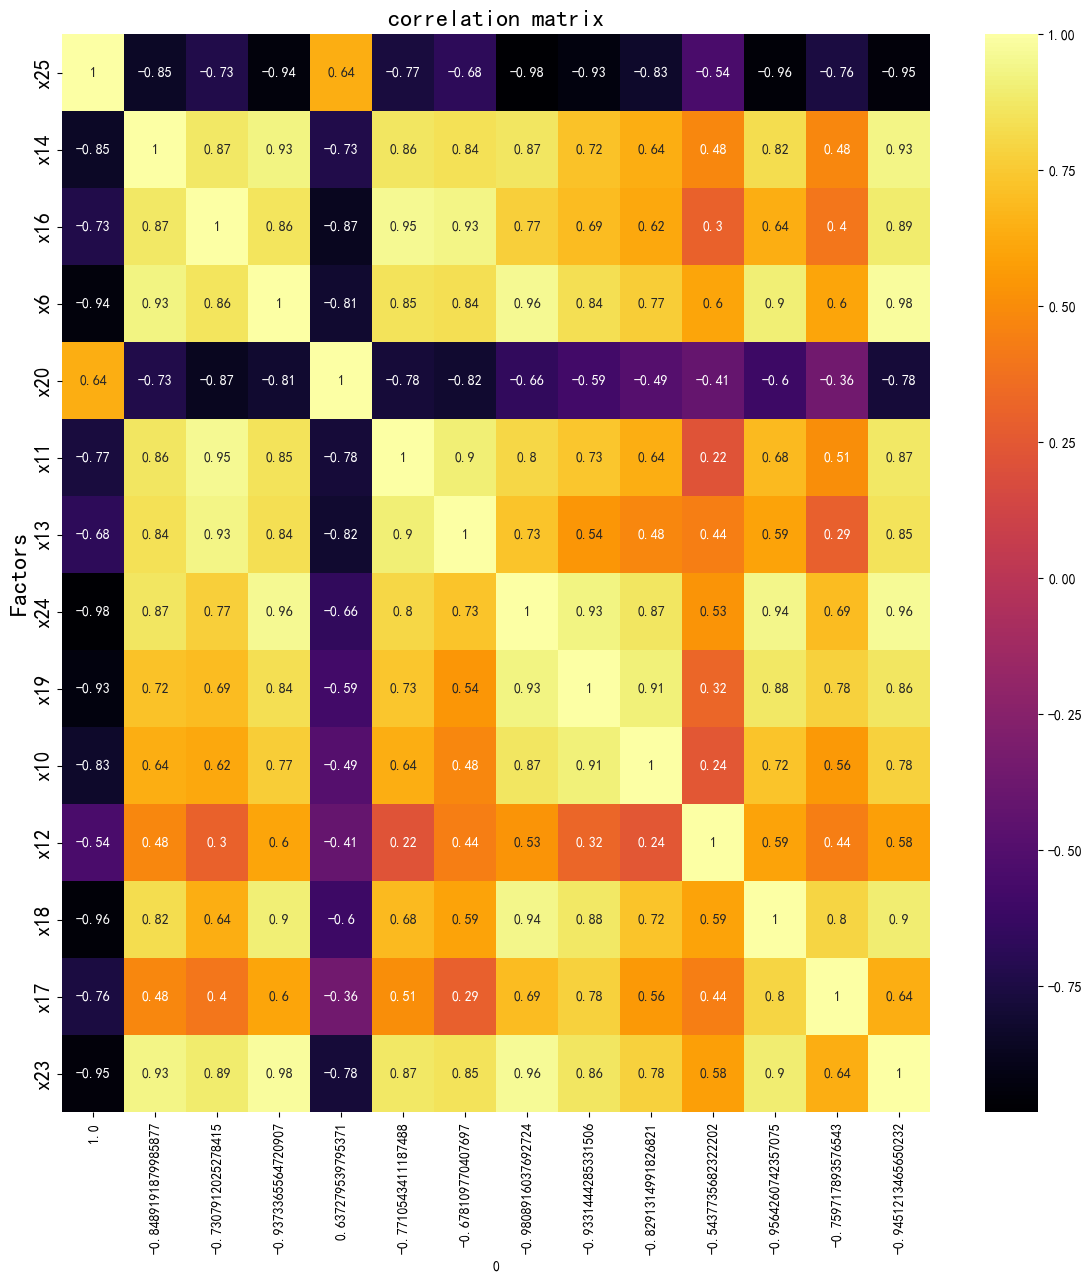

In [80]:
df = pd.read_excel(r"C:\Users\21550\Desktop\副本juzhen.xlsx")
# 将第一行作为列标签
df.columns = df.iloc[0]
print(df.iloc[:,0])
df = df[0:]
# print(df.columns)

# 将第一列作为行索引
df = df.set_index(df.columns[0])
# df = df[:,1:]
# df = df.set_axis(df.columns[0])

plt.figure(figsize = (14,14))
ax = sns.heatmap(df, annot=True, cmap="inferno")
 
# 设置y轴字体大小
ax.yaxis.set_tick_params(labelsize=15)
plt.title("correlation matrix", fontsize="xx-large")
 
# 设置y轴标签
plt.ylabel("Factors", fontsize="xx-large")
# 显示图片
plt.show()